y the first few rows
df.head()


# Graduation Rate Dataset


## Overview
This project analyzes a dataset containing information on students' ACT and SAT scores, parental education and income, high school and college GPA, and the number of years taken to graduate. The objective of this analysis is to identify patterns and trends in the data, potentially uncovering factors that influence graduation rates.



### Key Questions Answered
1. **What is the average ACT composite score and SAT total score of students?**
2. **How does parental level of education impact students' high school and college GPA?**
3. **Is there a correlation between parental income and students' academic performance?**
4. **What is the average number of years taken to graduate?**
5. **How do high school GPA and college GPA correlate?**
6. **What is the distribution of high school and college GPA among students?**
7. **Do students with higher ACT or SAT scores tend to graduate faster?**
8. **How does the GPA ratio (college GPA / high school GPA) vary across different parental education levels?**
9. **What factors most strongly correlate with a higher college GPA?**


In [15]:
##loading the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
# import the dataset
data = pd.read_csv('graduation_rate.csv')
data.head()

,ACT composite score,SAT total score,parental level of education,parental income,high school gpa,college gpa,years to graduate
0,22,1625,high school,40999,3.0,3.1,7
1,29,2090,associate's degree,75817,4.0,3.4,5
2,30,2188,bachelor's degree,82888,4.0,3.9,3
3,33,2151,associate's degree,93518,4.0,3.7,5
4,29,2050,associate's degree,79153,4.0,3.4,6


In [22]:
#information about the dataset
#the dataset contains 1000 columns and 7 columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ACT composite score          1000 non-null   int64  
 1   SAT total score              1000 non-null   int64  
 2   parental level of education  1000 non-null   object 
 3   parental income              1000 non-null   int64  
 4   high school gpa              1000 non-null   float64
 5   college gpa                  1000 non-null   float64
 6   years to graduate            1000 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 54.8+ KB


In [23]:
#dropping missing values
data.dropna(inplace=True)

#statistical summary of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ACT composite score,1000.0,28.6070,2.774211,20.0,27.00,28.5,31.0,36.0
SAT total score,1000.0,1999.9060,145.078361,1598.0,1898.00,2000.0,2099.0,2385.0
parental income,1000.0,67377.8520,18827.331050,18906.0,54269.75,67842.5,80465.5,124470.0
high school gpa,1000.0,3.7074,0.287381,2.8,3.50,3.8,4.0,4.0
college gpa,1000.0,3.3765,0.237179,2.6,3.20,3.4,3.5,4.0
years to graduate,1000.0,4.9820,1.414099,3.0,4.00,5.0,6.0,10.0


# DATA VISUALIZATION

C:\Users\Mendy\anaconda3\envs\spaceX\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


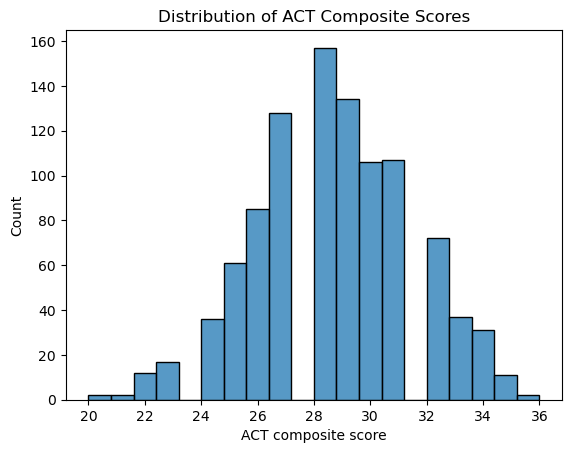

In [25]:
# Histogram for ACT composite scores
sns.histplot(data['ACT composite score'])
plt.title('Distribution of ACT Composite Scores')
plt.show()


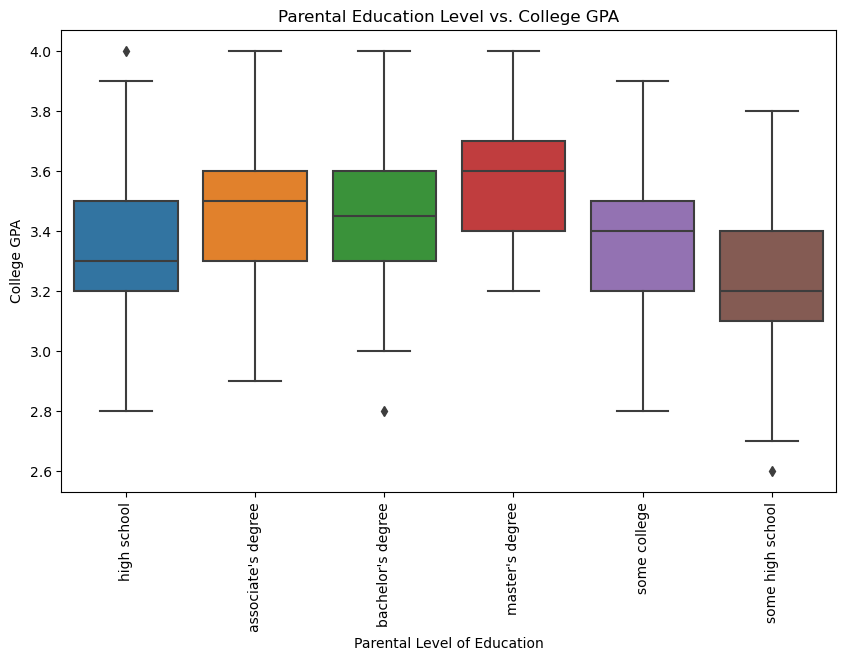

In [49]:
# Box plot for parental income vs. college GPA
plt.figure(figsize=(10, 6))

# Create box plot
sns.boxplot(x=data['parental level of education'], y=data['college gpa'])

# Rotate x-labels vertically
plt.xticks(rotation=90) 
plt.title('Parental Education Level vs. College GPA')
plt.xlabel('Parental Level of Education')
plt.ylabel('College GPA')

plt.show()

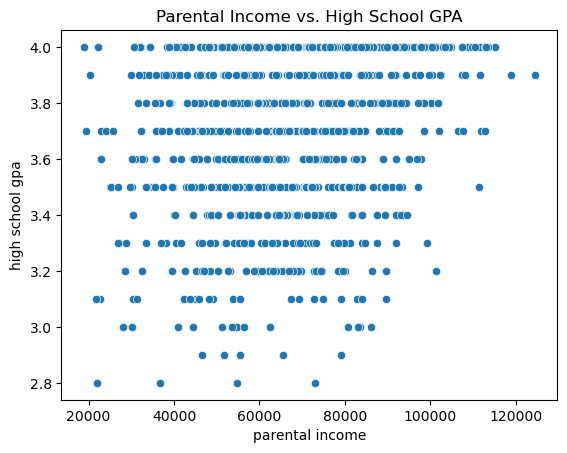

In [84]:
# Scatter plot for parental income vs. high school GPA
sns.scatterplot(x='parental income', y='high school gpa', data=data)

plt.title('Parental Income vs. High School GPA')
plt.show()

In [86]:
correlation = data['parental income'].corr(data['high school gpa'])
print(f'The correlation between parental income GPA and college GPA is {correlation:.2f}')

The correlation between parental income GPA and college GPA is 0.27


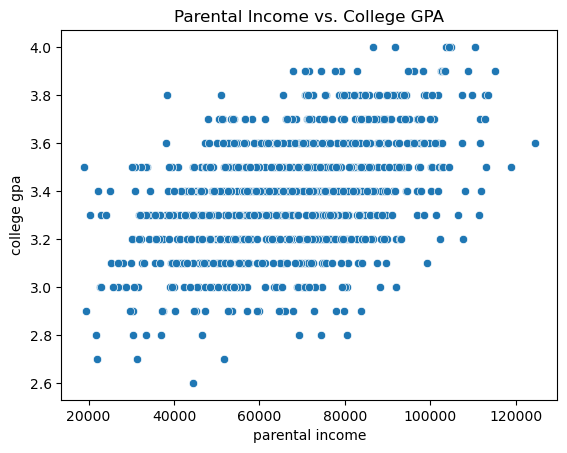

In [74]:
# Scatter plot for parental income vs. high school GPA
sns.scatterplot(x='parental income', y='college gpa', data=data)
plt.title('Parental Income vs. College GPA')
plt.show()

In [87]:
correlation = data['parental income'].corr(data['college gpa'])
print(f'The correlation between parental school GPA and college GPA is {correlation:.2f}')

The correlation between parental school GPA and college GPA is 0.46


## Exploratory Data Analysis

In [66]:
average_act = data['ACT composite score'].mean()
average_sat = data['SAT total score'].mean()
average_graduate_year = data['years to graduate'].mean()
print(f'Average ACT Composite Score: {average_act}')
print(f'Average SAT Total Score: {average_sat}')
print(f'Average Number of years taken to graduate: {average_graduate_year}')


Average ACT Composite Score: 28.607
Average SAT Total Score: 1999.906
Average Number of years taken to graduate: 4.982


### Impact of parental education

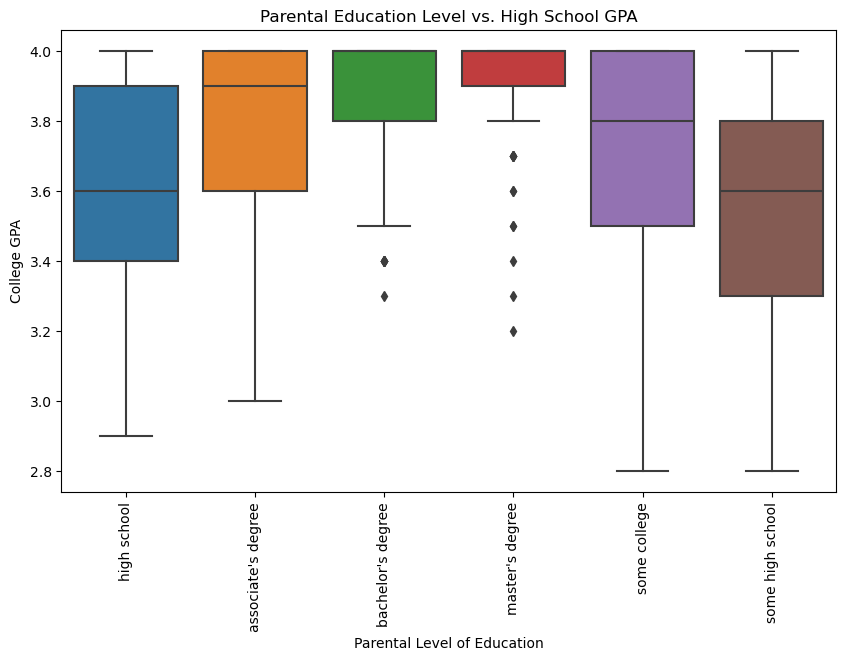

In [67]:
# Box plot for parental income vs. college GPA
plt.figure(figsize=(10, 6))

# Create box plot
sns.boxplot(x=data['parental level of education'], y=data['high school gpa'])

# Rotate x-labels vertically
plt.xticks(rotation=90) 
plt.title('Parental Education Level vs. High School GPA')
plt.xlabel('Parental Level of Education')
plt.ylabel('College GPA')

plt.show()

## Comparative Analysis:

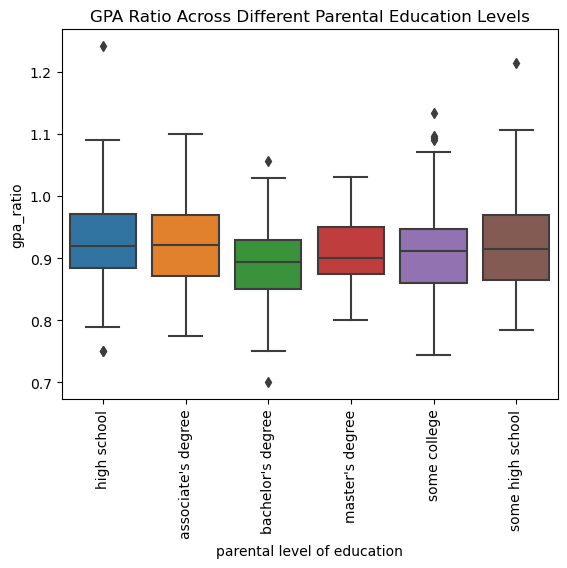

In [64]:
## Compare the GPA ratios (college GPA / high school GPA) across different parental education levels.
data['gpa_ratio'] = data['college gpa'] / data['high school gpa']
sns.boxplot(x='parental level of education', y='gpa_ratio', data=data)
plt.xticks(rotation=90) 
plt.title('GPA Ratio Across Different Parental Education Levels')
plt.show()


In [81]:
correlation = data['college gpa'].corr(data['high school gpa'])
print(f'The correlation between high school GPA and college GPA is {correlation:.2f}')

The correlation between high school GPA and college GPA is 0.52
